# Notebook to get pings inside a polygon

In [1]:
import pandas as pd
import geopandas as gpd
import os
import time
from shapely.geometry import Point
from IPython.display import clear_output


## Set polygon information

POLYGON_FILE must be a geojson file.

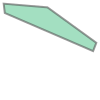

In [3]:
INPUT_FOLDER = '../input/'
POLYGON_FILE = 'elm_ksa.geojson'

gdf_polygon = gpd.read_file(INPUT_FOLDER+POLYGON_FILE)

crs = {'init': 'epsg:4326'}
POLYGON = gdf_polygon.geometry[0]
POLYGON

## Getting valid pings

1. Iterate trough all files inside a folder (lifesight structure), reading all files.
2. Generate the geometry (Point) for each file.
3. Get pings inside the given polygon.
4. Join all pings together.


In [4]:
FOLDER = INPUT_FOLDER + 'COUNTRY=SAU/tier=TIER1/'

count=0
num_files = len(os.listdir(FOLDER))
list_dataframes = []

start = time.time()
print("Reading files...")
# Iterate through all small files to join them in one big dataframe.

for file in os.listdir(FOLDER):
    if file == '_SUCCESS':
        continue
        
    print("{}/{}".format(count, num_files-1))
    
    df = pd.read_csv(FOLDER+file, compression='gzip', escapechar='\\')
    
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
    gdf = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
    
    inside = gdf.geometry.within(POLYGON)
    
    if inside.any():
        list_dataframes.append(gdf[inside])   
    
    clear_output(wait=True)
    count+=1

#df.to_csv("one_file.csv")

end = time.time()    
print("Finished to read files. {} secs".format(end-start))

print("Joining dataframes...")
start = time.time()
df_KSA = pd.concat(list_dataframes)

end = time.time()
print("Finished to join dataframes. {} secs.".format(end-start))

Finished to read files. 1045.112458229065 secs
Joining dataframes...
Finished to join dataframes. 0.46457648277282715 secs.


## Save output into a csv file

In [6]:
OUTPUT_FOLDER = '../output/'
df_KSA.to_csv(OUTPUT_FOLDER + 'points_in_mecca.csv')